Let's try reading the data naively
---------------------------------------

In [1]:
import pandas as pd
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dummy_data.csv")

In [3]:
data.head()

,date,zip,X,email
0,2015-02-21 01:05:03,13611,5.014501,jeff.dasovich@enron.com
1,2015-02-21 04:49:03,16056,6.715560,Steven Kelly
2,2015-02-27 10:16:34,2888,8.918459,karen.denne@enron.com
3,2015-02-20 19:11:00,7827,5.664665,enron-owner@lists.qgadc.com
4,2015-02-21 13:20:11,23887,6.159554,jeff.dasovich@enron.com


In [4]:
data = pd.read_csv("dummy_data.csv", dtype={'zip':str})

In [5]:
data.head()

,date,zip,X,email
0,2015-02-21 01:05:03,13611,5.014501,jeff.dasovich@enron.com
1,2015-02-21 04:49:03,16056,6.715560,Steven Kelly
2,2015-02-27 10:16:34,02888,8.918459,karen.denne@enron.com
3,2015-02-20 19:11:00,07827,5.664665,enron-owner@lists.qgadc.com
4,2015-02-21 13:20:11,23887,6.159554,jeff.dasovich@enron.com


In [6]:
data = pd.read_csv("dummy_data.csv", dtype={'zip':str}, parse_dates=['date'])

In [7]:
print data['date'].dtype

object


In [8]:
dates = pd.to_datetime(data['date'], errors='raise')

ValueError: month must be in 1..12

In [9]:
bad_dates = data['date'].apply(lambda x: int(x.split('-')[1]) == 0)

data.drop(data.index[bad_dates], inplace=True)

data['date'] = pd.to_datetime(data.pop('date'))
print data['date'].dtype

datetime64[ns]


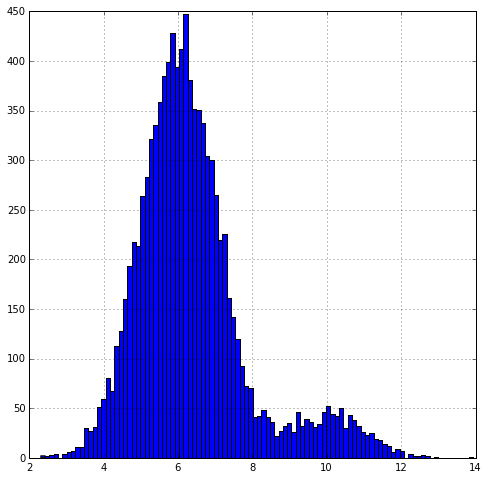

In [10]:
plt.figure(figsize=(8,8))
data['X'].hist(bins=100)

In [11]:
data = data[data['X'] <= 9.0]

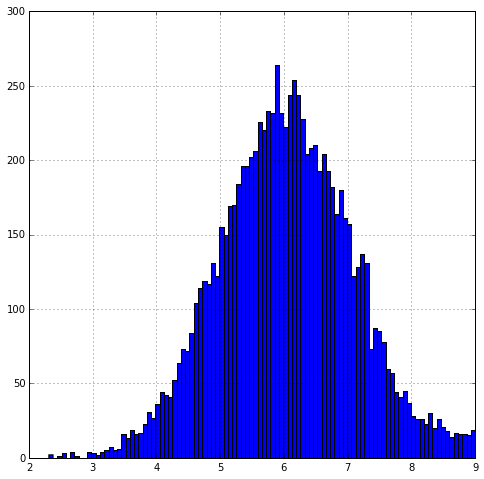

In [12]:
plt.figure(figsize=(8,8))
data['X'].hist(bins=100)

In [13]:
data['email'].head()

0        jeff.dasovich@enron.com
1                   Steven Kelly
2          karen.denne@enron.com
3    enron-owner@lists.qgadc.com
4        jeff.dasovich@enron.com
Name: email, dtype: object

In [14]:
email_pattern = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"

In [15]:
data = data[data['email'].str.contains(email_pattern)]

/home/jaidev/anaconda/lib/python2.7/site-packages/pandas/core/strings.py:184: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  " groups, use str.extract.", UserWarning)


In [16]:
data.head()

,zip,X,email,date
0,13611,5.014501,jeff.dasovich@enron.com,2015-02-21 01:05:03
2,02888,8.918459,karen.denne@enron.com,2015-02-27 10:16:34
3,07827,5.664665,enron-owner@lists.qgadc.com,2015-02-20 19:11:00
4,23887,6.159554,jeff.dasovich@enron.com,2015-02-21 13:20:11
5,35461,5.618556,jeff.dasovich@enron.com,2015-02-22 04:17:01
